# <font color='#ff1a75'> MULTIPLE LINEAR REGRESSION:STARTUPS DATA


## <font color='#333300'>Problem Statement

### Prepare a prediction model for profit of 50_startups data. Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.
+ R&D Spend -- Research and devolop spend in the past few years
+ Administration -- spend on administration in the past few years
+ Marketing Spend -- spend on Marketing in the past few years
+ State -- states from which data is collected
+ Profit  -- profit of each state in the past few years


In [1]:
#import the required libraires
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
#read the dataset 
startups=pd.read_csv('50_Startups.csv')

In [3]:
#to check top 10 rows in dataset
startups.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
startups.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
#droping the unecessary features
startups1=startups.drop(columns=['State'],axis=1)

In [7]:
startups1.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [8]:
startups2=startups1.rename({'R&D Spend':'RDS','Administration': 'Admin', 'Marketing Spend': 'MktSpnd'},axis=1)
startups2.head()

,RDS,Admin,MktSpnd,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [9]:
startups2[startups2.duplicated(keep=False)]

,RDS,Admin,MktSpnd,Profit


In [10]:
#check whether outliers are present in RDS column

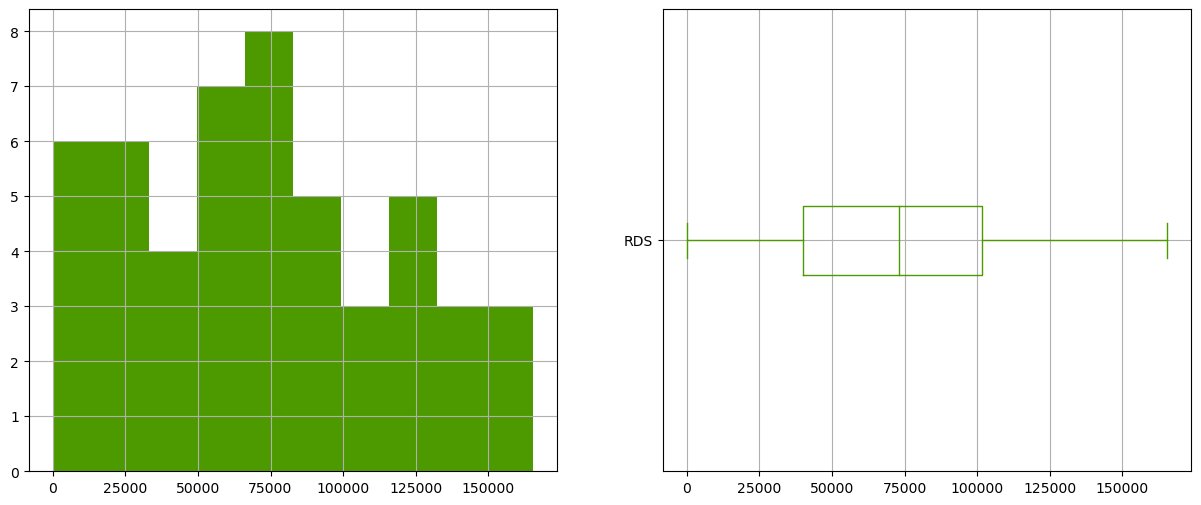

In [11]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
startups2['RDS'].hist(color='#4d9900')
plt.subplot(1,2,2)
startups2.boxplot(column=['RDS'],vert=False,color='#4d9900',patch_artist=False)

plt.show()

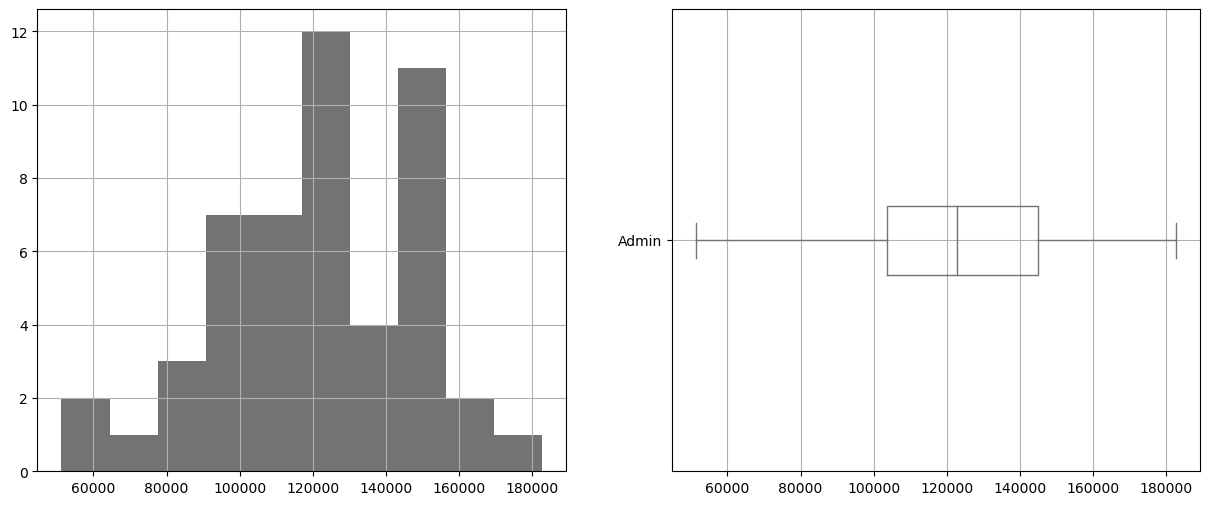

In [12]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
startups2['Admin'].hist(color='#737373')
plt.subplot(1,2,2)
startups2.boxplot(column=['Admin'],color='#737373',patch_artist=False,vert=False)

plt.show()

In [13]:
startups2.columns

Index(['RDS', 'Admin', 'MktSpnd', 'Profit'], dtype='object')

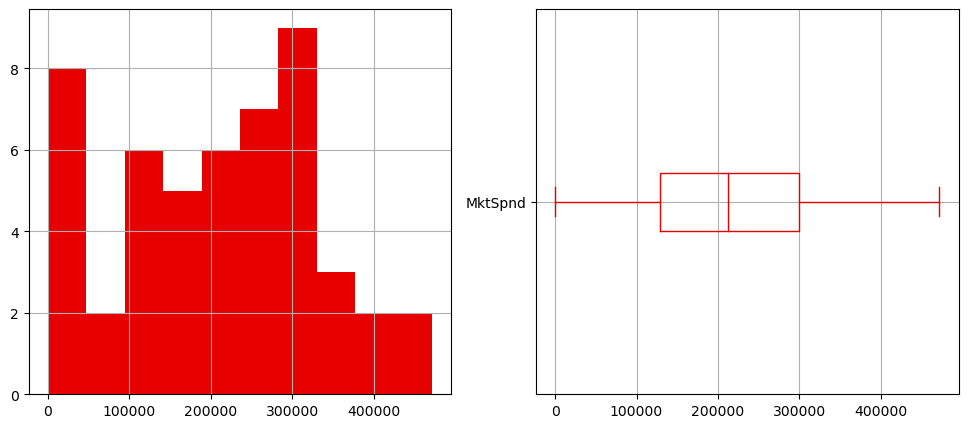

In [14]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
startups2['MktSpnd'].hist(color='#e60000')
plt.subplot(1,2,2)
startups2.boxplot(column=['MktSpnd'],color='#e60000',patch_artist=False,vert=False)
plt.show()

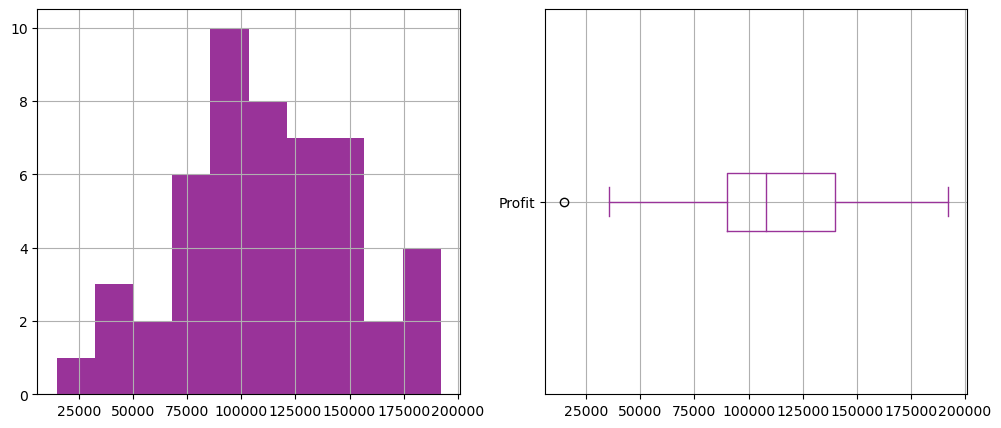

In [15]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
startups2['Profit'].hist(color='#993399')
plt.subplot(1,2,2)
startups2.boxplot(column=['Profit'],color='#993399',patch_artist=False,vert=False)
plt.show()

### Kde plot-To check whether the datas are normally distributed or not

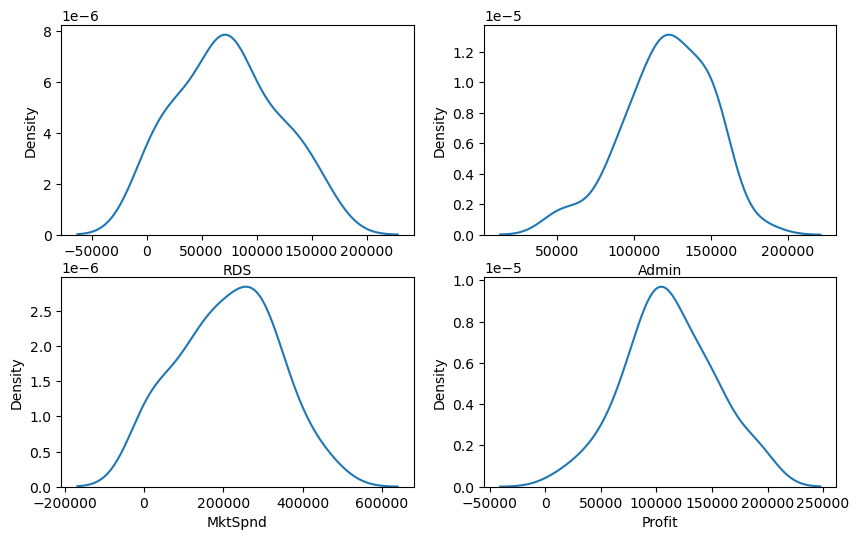

In [16]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
sns.kdeplot(startups2['RDS'])
plt.subplot(2,2,2)
sns.kdeplot(startups2['Admin'])
plt.subplot(2,2,3)
sns.kdeplot(startups2['MktSpnd'])
plt.subplot(2,2,4)
sns.kdeplot(startups2['Profit'])
plt.show()

In [17]:
#Correlation matrix
startups2.corr()

,RDS,Admin,MktSpnd,Profit
RDS,1.000000,0.241955,0.724248,0.972900
Admin,0.241955,1.000000,-0.032154,0.200717
MktSpnd,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


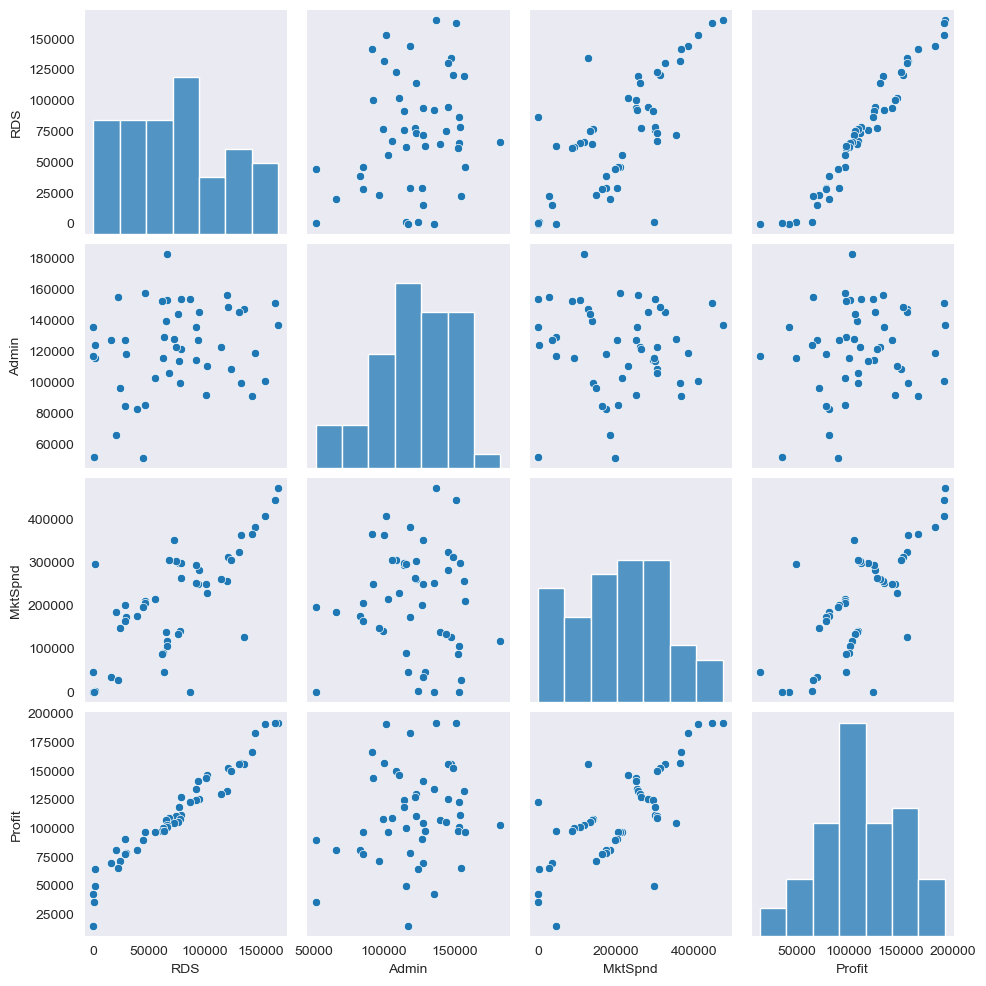

In [18]:
# Scatterplot between all variables, using pairplot

sns.set_style(style='dark')
sns.pairplot(startups2)
plt.show()

# Model1- Creating a model to predict profit with better accuracy and low error, without using any transformation

In [19]:
model1 = smf.ols('Profit~RDS+Admin+MktSpnd', data = startups2).fit()

In [20]:
# Coefficients
model1.params

Intercept    50122.192990
RDS              0.805715
Admin           -0.026816
MktSpnd          0.027228
dtype: float64

In [21]:
# checking the t and p-Values

print(model1.tvalues, '\n', model1.pvalues)

Intercept     7.626218
RDS          17.846374
Admin        -0.525507
MktSpnd       1.655077
dtype: float64 
 Intercept    1.057379e-09
RDS          2.634968e-22
Admin        6.017551e-01
MktSpnd      1.047168e-01
dtype: float64


In [22]:
# Rsquared and adjusted rsquared value
(model1.rsquared,model1.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [23]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 05 Jul 2023   Prob (F-statistic):           4.53e-30
Time:                        23:23:54   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
Admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
MktSpnd        0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
pred1=model1.predict(startups2)
actual=startups2.Profit

In [25]:
rmse1=np.sqrt(mean_squared_error(actual,pred1))
rmse1

8855.344489015142

## Test for Normality of Residuals (Q-Q Plot)

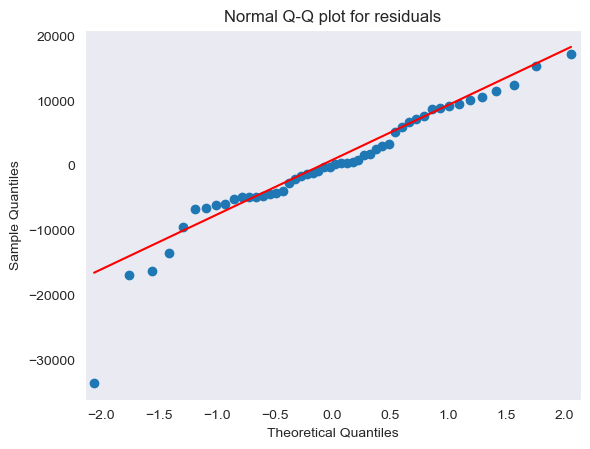

In [26]:
sm.qqplot(model1.resid,line='q')
plt.title('Normal Q-Q plot for residuals')
plt.show()

In [27]:
list(np.where(model1.resid<-20000))


[array([49], dtype=int64)]

## Residual plot for homoscedasticity

In [28]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

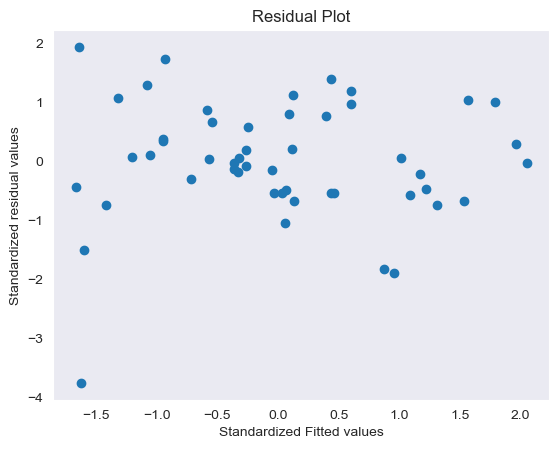

In [29]:
plt.scatter(get_standardized_values(model1.fittedvalues),
            get_standardized_values(model1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Detecting influencers/outliers- By Cook's distance and influence plot

In [30]:
model1_influence = model1.get_influence()
(c, _) = model1_influence.cooks_distance

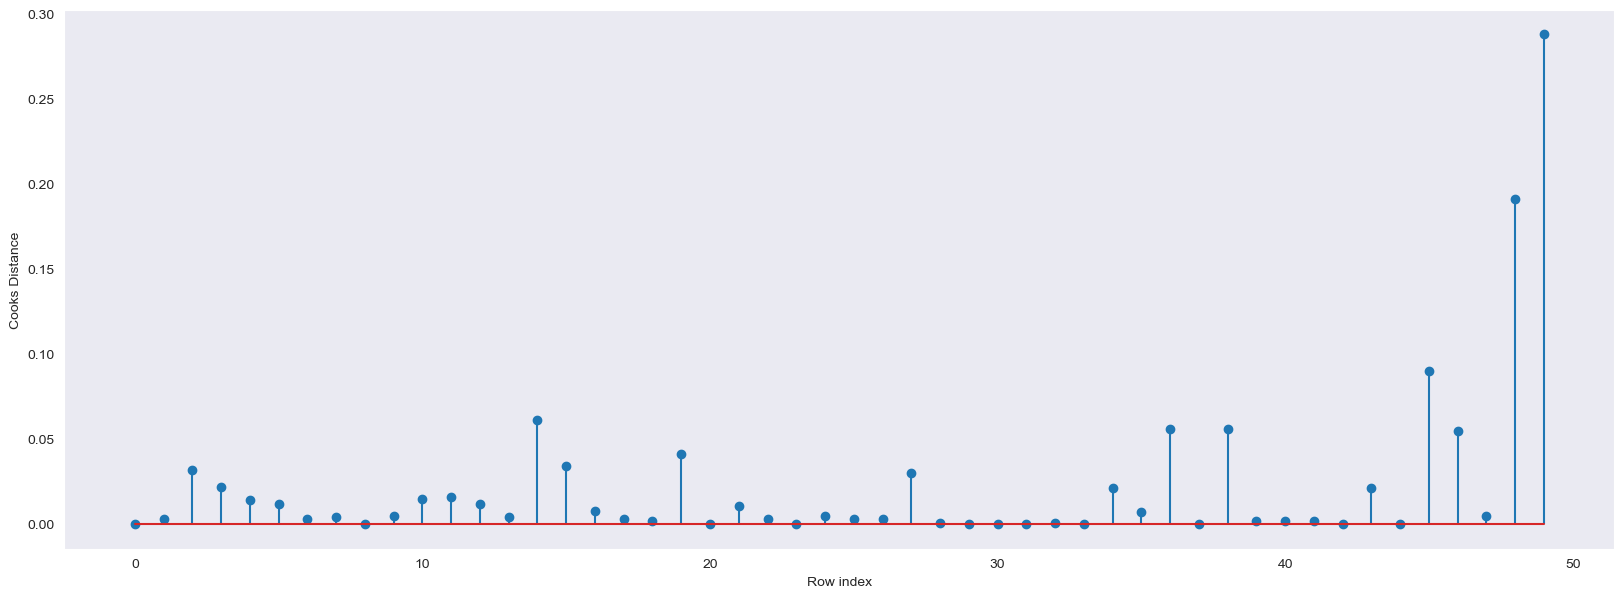

In [31]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startups2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()


In [32]:
#index and value of outliers
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

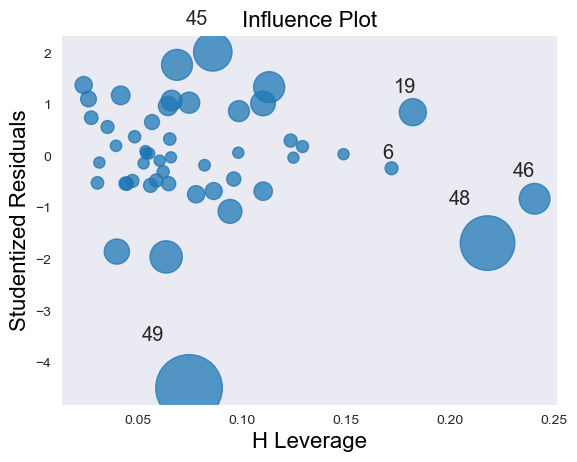

In [33]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model1)
plt.show()

In [34]:
k = startups2.shape[1]
n = startups2.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.30000000000000004

### From the visualization it is evident that at the index of 49 which is highly influenced so we are droping the data from our dataset

In [35]:
startups2[startups2.index.isin([49])]

,RDS,Admin,MktSpnd,Profit
49,0.0,116983.8,45173.06,14681.4


In [36]:
startups3=startups2.drop(startups2.index[[49]],axis=0).reset_index()

In [37]:
startups3=startups3.drop(['index'],axis=1)

In [38]:
startups3.head()

,RDS,Admin,MktSpnd,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


## Model2-Predicting a new model(with outlier removed dataset)

In [39]:
model2 = smf.ols('Profit~RDS+Admin+MktSpnd', data = startups3).fit()
##Coefficent
model2.params

Intercept    52382.439251
RDS              0.783002
Admin           -0.022201
MktSpnd          0.025234
dtype: float64

In [40]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Wed, 05 Jul 2023   Prob (F-statistic):           8.85e-32
Time:                        23:23:56   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RDS            0.7830      0.038     20.470      0.000       0.706       0.860
Admin         -0.0222      0.043     -0.518      0.607      -0.109       0.064
MktSpnd        0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
actual1=startups3.Profit

In [42]:
pred2=model2.predict(startups3)

In [43]:
rmse2=np.sqrt(mean_squared_error(actual1,pred2))
rmse2

7430.589093678348

## Creating a table with all the obsevations

In [44]:
table={
    'models':['model1','model2'],
       'R_squared':[model1.rsquared,model2.rsquared],
       'RMSE':(rmse1,rmse2)
      }

table=pd.DataFrame(table)
table

,models,R_squared,RMSE
0,model1,0.950746,8855.344489
1,model2,0.961316,7430.589094


# Conslusion

# From all the observations and calculations it is evident that Model2 is the best model to predict profit with a better accuracy, since it has the highest rsquared value and lowest rmse value.

In [45]:
predicted = pd.DataFrame()
predicted['RDS'] = startups3.RDS
predicted['Admin'] = startups3.Admin
predicted['MktSpnd'] = startups3.MktSpnd
predicted['Profit']=startups3.Profit
predicted['pred_Profit']=pd.DataFrame(pred2)
predicted.head(20)

,RDS,Admin,MktSpnd,Profit,pred_Profit
0,165349.20,136897.80,471784.10,192261.83,190716.676999
1,162597.70,151377.59,443898.53,191792.06,187537.122227
2,153441.51,101145.55,407934.54,191050.39,180575.526396
3,144372.41,118671.85,383199.62,182901.99,172461.144642
4,142107.34,91391.77,366168.42,166187.94,170863.486721
5,131876.90,99814.71,362861.36,156991.12,162582.583177
6,134615.46,147198.87,127716.82,156122.51,157741.338633
7,130298.13,145530.06,323876.68,155752.60,159347.735318
8,120542.52,148718.95,311613.29,152211.77,151328.826941
9,123334.88,108679.17,304981.62,149759.96,154236.846778
